# Visualizations. 

This includes the antennas beam patterns, the trajectory and the projection of the beam pattern on the sky. 

In [18]:
import numpy as np
import pandas as pd
import copy
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from power_to_temperature import *
from Tgsm import*

Cmap = copy.copy(cm.get_cmap("jet"))
Cmap_mock = copy.copy(cm.get_cmap("plasma"))
Cmap.set_under("w")
Cmap_mock.set_under('w')
%matplotlib inline

impath = 'images/'

import warnings
warnings.filterwarnings('ignore')

## Trajectory

We will compute the trajectory of a full dayof observation for SCI-HI, for the day 2018-06-14 at 00:00:00 until 2018-06-15 at 00:00:00.

For this we will generate an array of time and then use the trajectory function in Tgsm.py for this array.

In [19]:
dates =  ['2018-06-14 00:00:00','2018-06-15 00:00:00']
T = Time(dates)
dt = T[1]-T[0]
times = T[0] + dt*np.linspace(0.,1.,300)
l_gal,b_gal = trajectory(times)

Text(0, 0.5, '$b$ [degrees]')

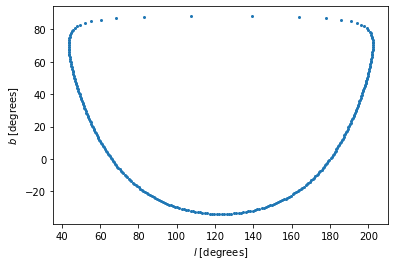

In [20]:
plt.plot(l_gal,b_gal,'o',markersize=2)
plt.xlabel(r'$l$ [degrees]')
plt.ylabel(r'$b$ [degrees]')
#plt.savefig(impath+'trayectory.png')

## Trajectory on Global Sky Map

Visualization of the Galaxy in 70 MHz along with the trajectory previously calculated.

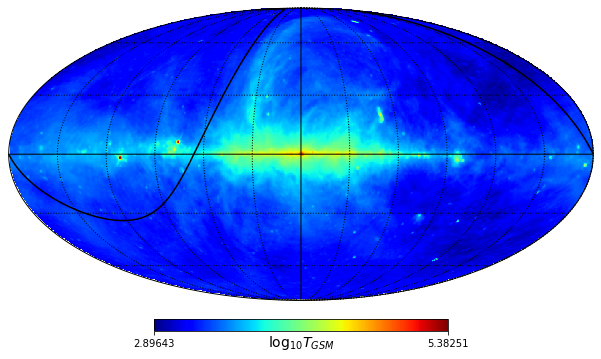

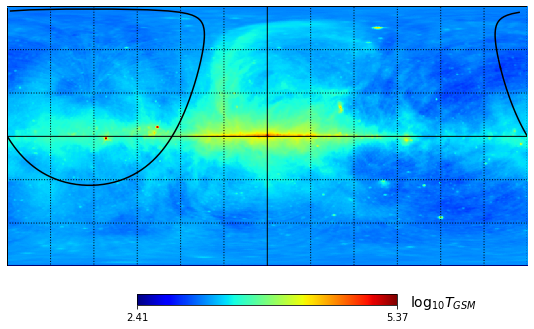

In [21]:
# Data of the GSM model for 70 MHz.
Data_70 = pd.read_hdf("gsm_maps/gsm_70MHz.hdf5")
bmap_gal = Data_70.values[:,0]
bmap_gal = np.log10(bmap_gal)

#Mollweide visualization
hp.mollview(bmap_gal,cmap=Cmap, unit = r'$\log_{10}T_{GSM}$',title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True) #Projects the trajectory.
hp.graticule()
#plt.savefig(impath+'Trajectory_mollview.png')
plt.show()

#Cartesian visualization
hp.cartview(bmap_gal,cmap=Cmap, unit = r'$\log_{10}T_{GSM}$',title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
hp.graticule()
#plt.savefig(impath+'Trajectory_cartview.png')
plt.show()

## Simulated mock antenna pattern

In [22]:
antenna = 'biscus'

F = 70
Data = pd.read_hdf('mock_pattern_'+antenna+'/0%dMHz.hdf5'%F)
theta,phi = np.radians(Data.values[:,0]),np.radians(Data.values[:,1])
dB = Data.values[:,2]
X,Y,Z=np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)
Temp = Radio_source_trans(dB,F,1e6)

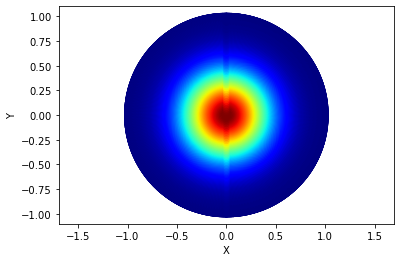

In [23]:
plt.scatter(X, Y, c=Temp, cmap=cm.jet,vmin=0)
m = cm.ScalarMappable(cmap=cm.jet)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
#plt.savefig(impath+'real_pattern.png')
plt.show()

Pattern visualization on the sky, using the previous antenna trajectory: 

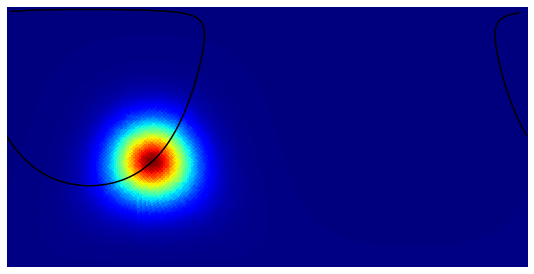

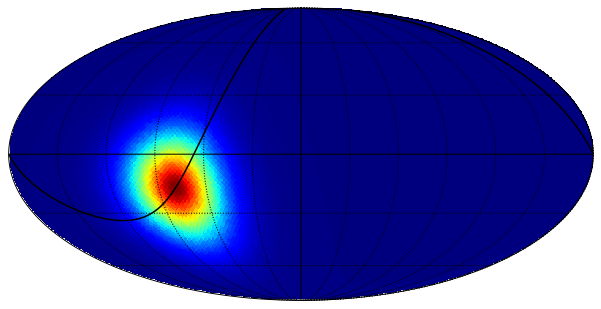

In [24]:
t0 = Time('2018-06-14 12:00:00')
# Getting the pattern 
l,b,Temp = pattern(time = t0,Freq=70,PATH='mock_pattern_biscus/')
    
# Projecting the pattern into pixels.
nside = 32
pix = hp.ang2pix(nside,l, b, lonlat=True)

# Filling the pixels with the temperature data.
bmap_pat = np.zeros(hp.nside2npix(nside))
bmap_pat[pix] = Temp
    
# Cartesian visualization.
hp.cartview(bmap_pat,cmap=Cmap,cbar=False,title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
plt.savefig(impath+'real_cartview.png')
plt.show()
    
#Mollweide visualization 
hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
hp.graticule()
plt.savefig(impath+'real_mollview.png')
plt.show()

## HIBiscus 

In this part of the notebook we will generate the beam pattern of the antenna for diferent times, in order to see how the pattern moves along the sky in function of time. Also the trajectory is projected to check if the center of the pattern coincides with the trajectory.

For this we will use the pattern function in Tgsm.py

In [25]:
antenna = 'biscus'

F = 70
Data = pd.read_hdf('antenna_beam_'+antenna+'/0%dMHz.hdf5'%F)
theta,phi = np.radians(Data.values[:,0]),np.radians(Data.values[:,1])
dB = Data.values[:,2]
X,Y,Z=np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)
Temp = Radio_source_trans(dB,F,1e6)

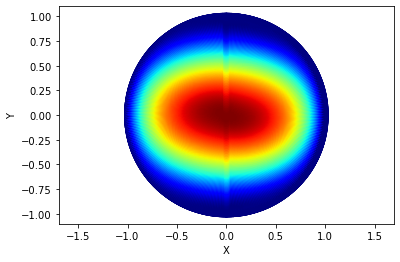

In [26]:
plt.scatter(X, Y, c=Temp, cmap=cm.jet,vmin=0)
m = cm.ScalarMappable(cmap=cm.jet)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
#plt.savefig(impath+'real_pattern.png')
plt.show()

2013-06-14 00:00:00.000


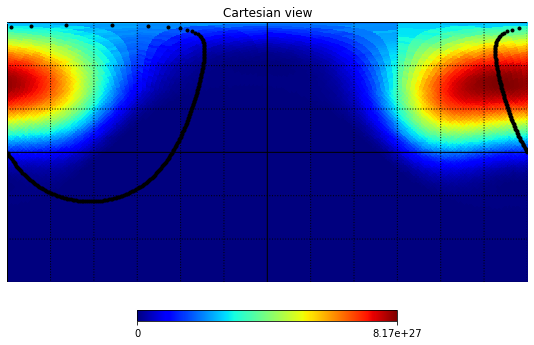

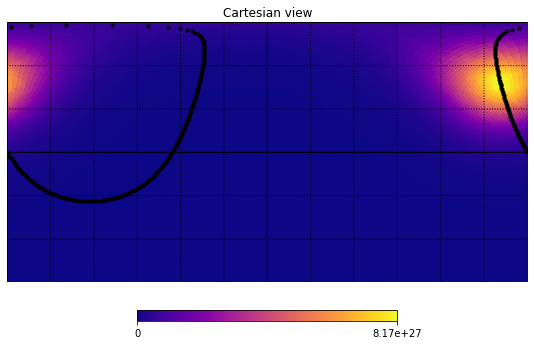

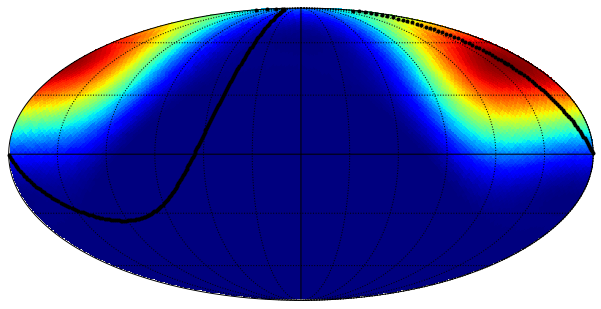

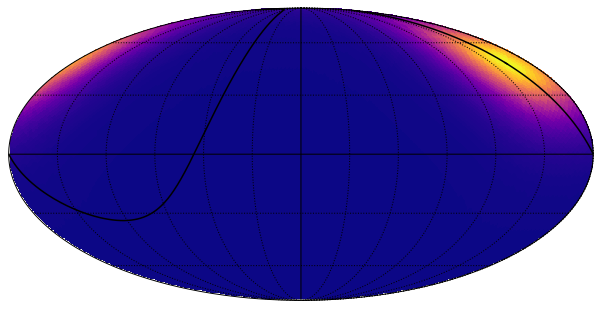

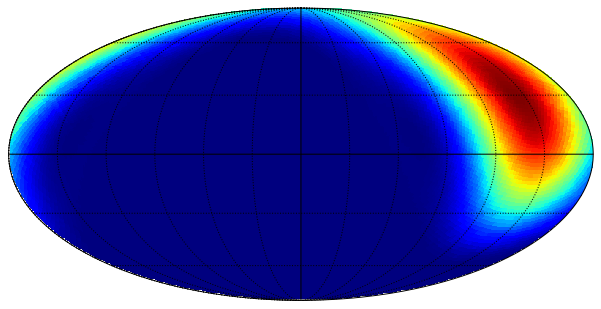

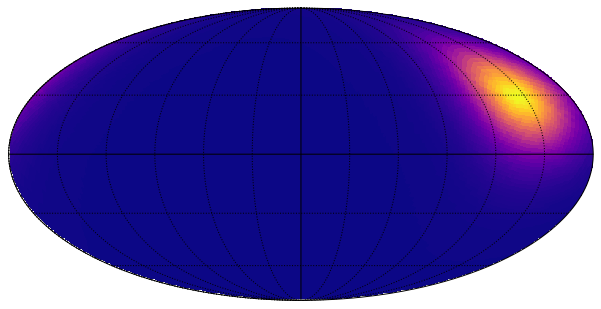

2013-06-14 04:00:00.000


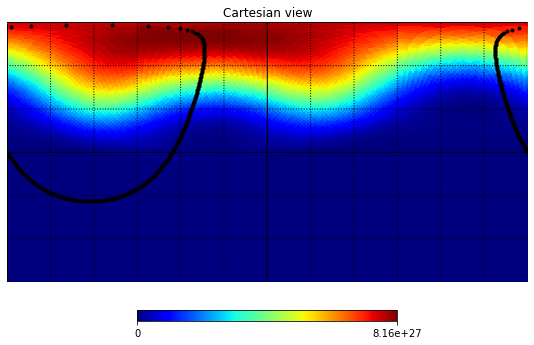

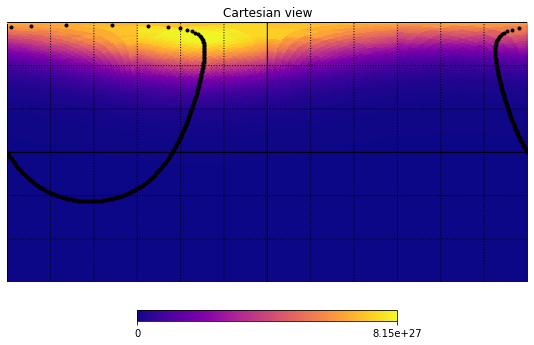

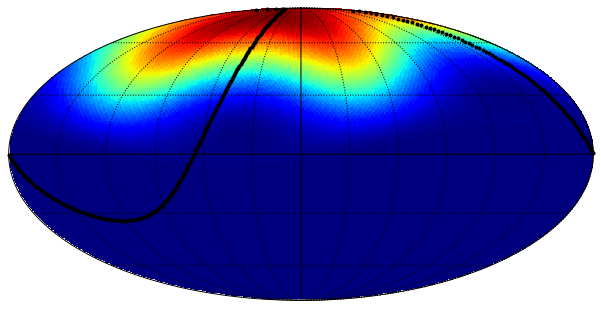

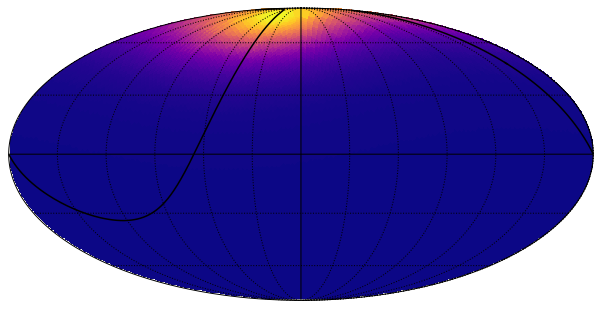

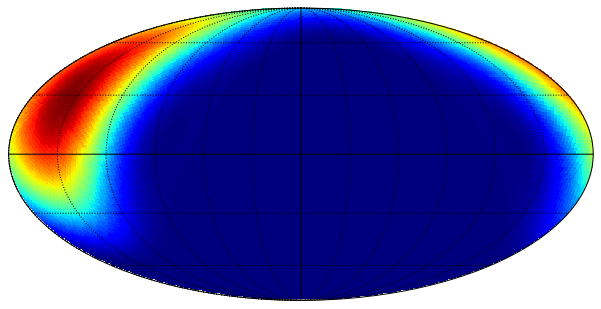

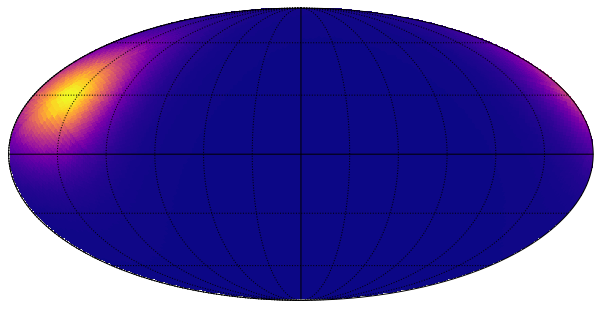

2013-06-14 08:00:00.000


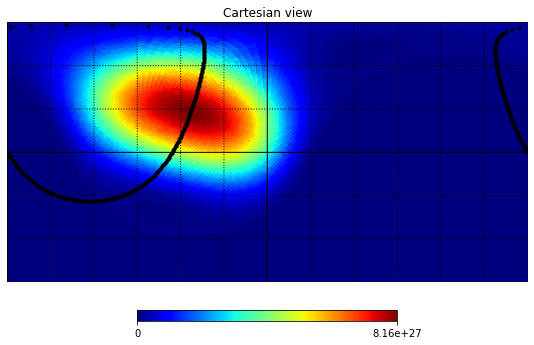

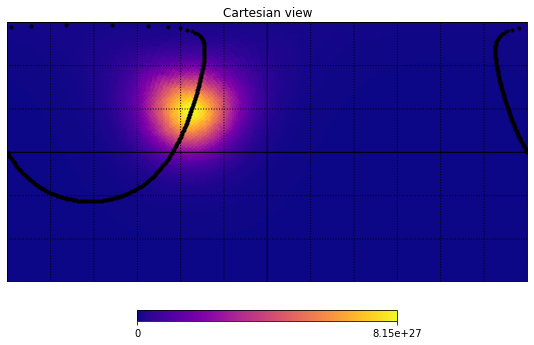

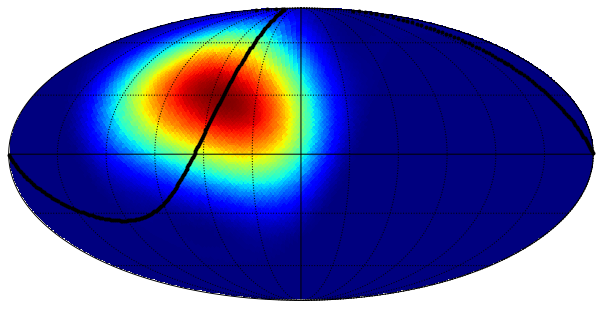

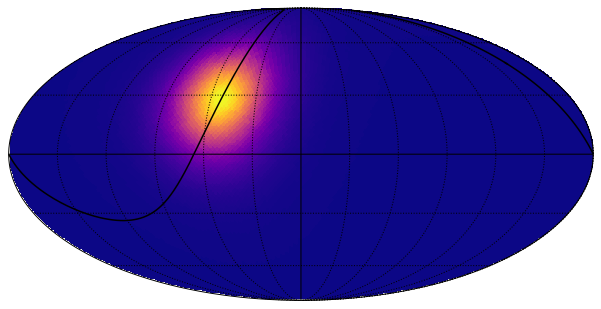

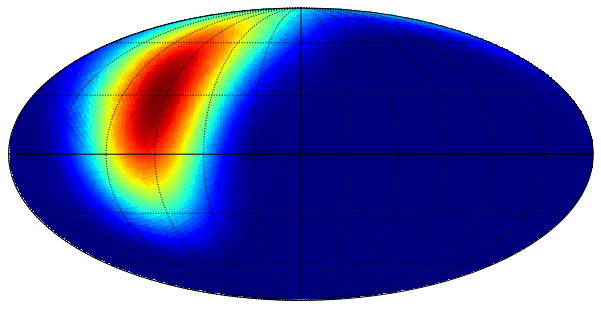

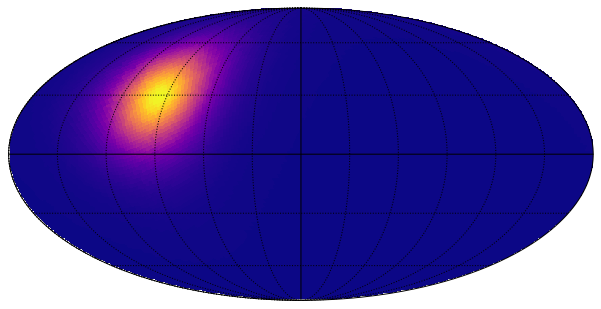

2013-06-14 12:00:00.000


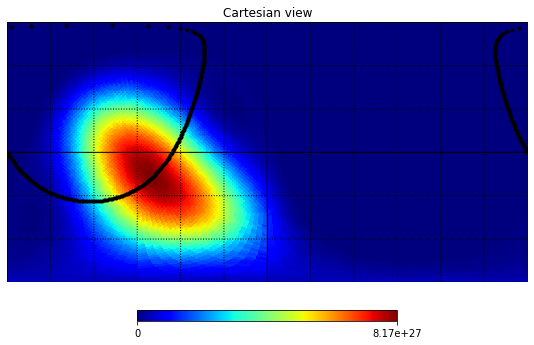

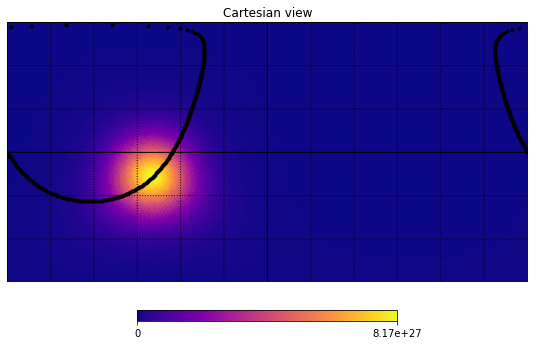

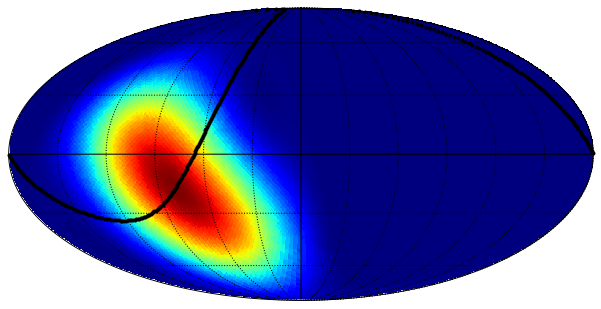

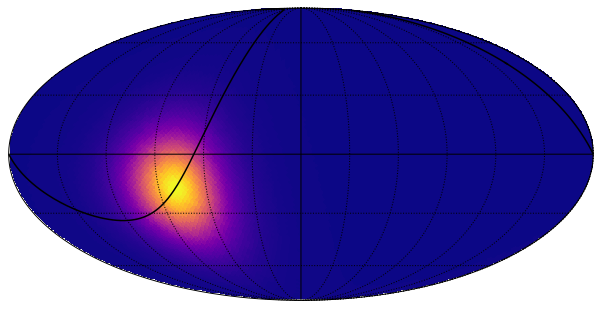

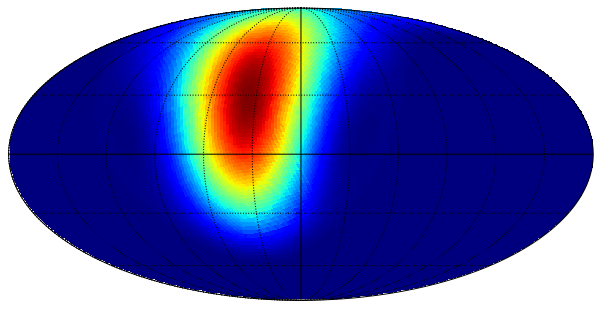

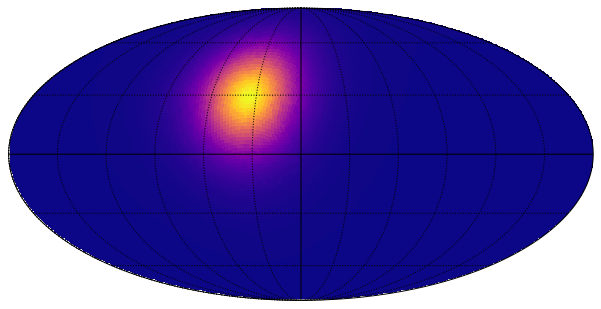

2013-06-14 16:00:00.000


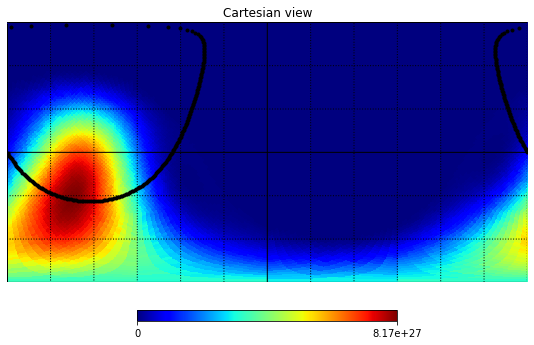

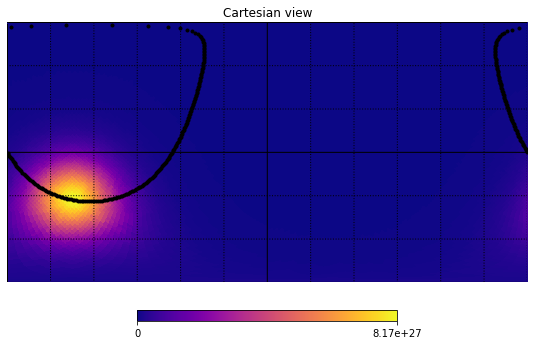

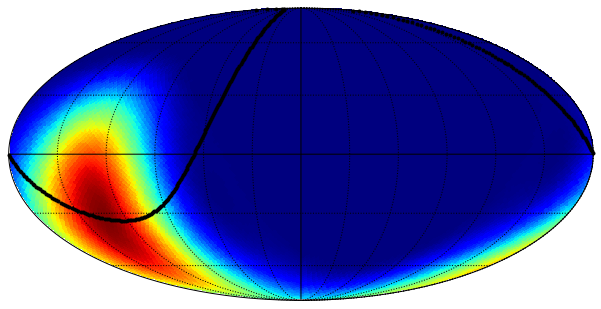

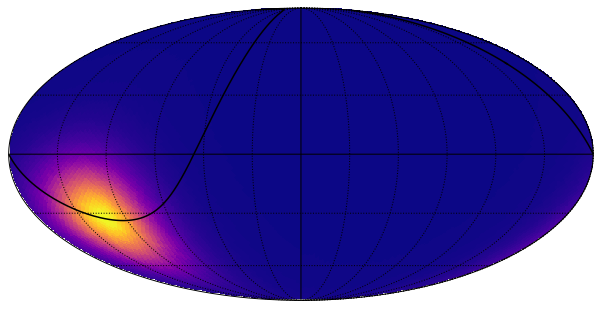

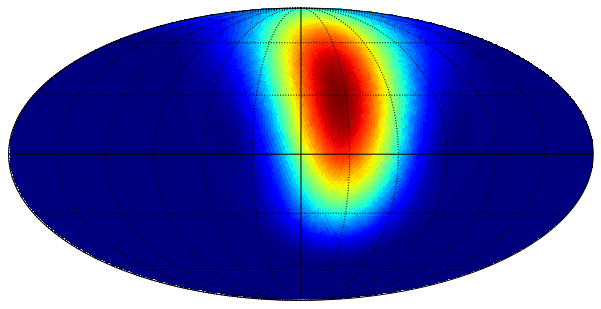

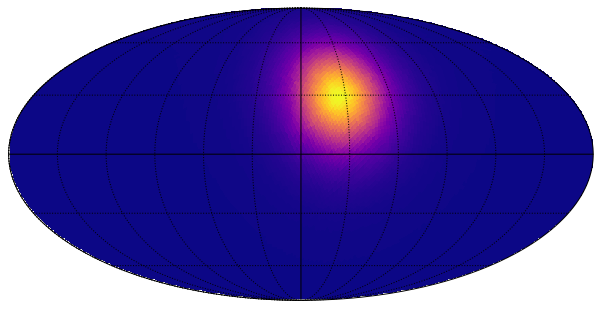

2013-06-14 20:00:00.000


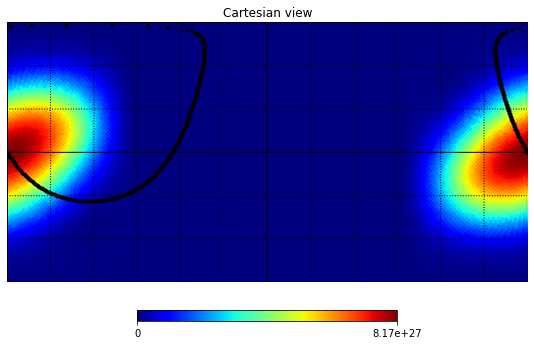

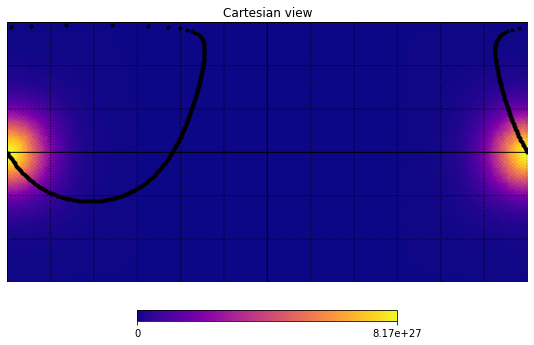

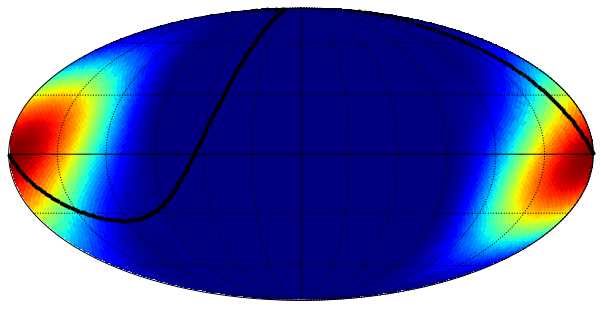

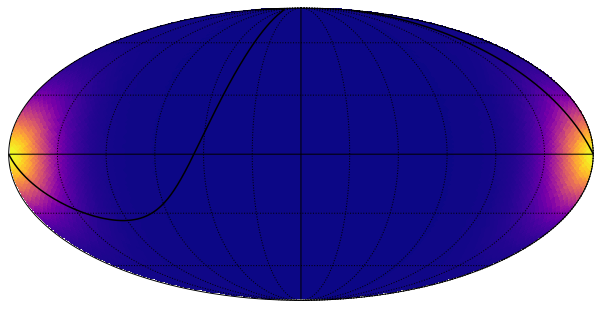

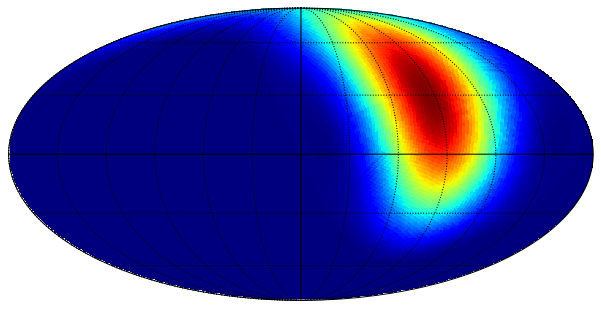

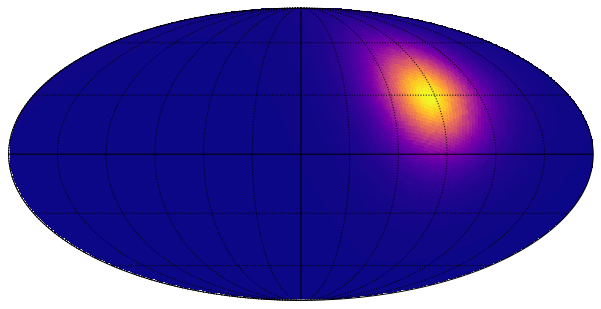

In [27]:
t0 = Time('2013-06-14 00:00:00')
dt = 4*u.hour
times = t0 + dt*np.arange(0,24/dt.value)
for i in range(len(times)):
    print (times[i])
    # Getting the pattern 
    l,b,Temp = pattern(time = times[i],Freq=70, PATH = 'antenna_beam_'+antenna+'/')
    l_mock,b_mock,Temp_mock = pattern(time = times[i],Freq=70,PATH='mock_pattern_'+antenna+'/')
    
    # Projecting the pattern into pixels.
    nside = 32
    pix = hp.ang2pix(nside,l, b, lonlat=True)
    pix_mock = hp.ang2pix(nside,l_mock, b_mock, lonlat=True)
    
    # Filling the pixels with the temperature data.
    bmap_pat = np.zeros(hp.nside2npix(nside))
    bmap_pat[pix] = Temp
    bmap_pat_mock = np.zeros(hp.nside2npix(nside))
    bmap_pat_mock[pix] = Temp_mock
    
    # Cartesian visualization.
    hp.cartview(bmap_pat,cmap=Cmap)
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    hp.graticule()
    hp.cartview(bmap_pat_mock,cmap=Cmap_mock)
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    hp.graticule()
    #plt.savefig('Imagenes/'+str(t0+i*dt)+'_cartview_gal.png')
    plt.show()
    
    #Mollweide visualization 
    hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    hp.graticule()
    hp.mollview(bmap_pat_mock,cmap=Cmap_mock,cbar=False,title='')
    hp.projplot(l_gal, b_gal,'-k',lonlat=True)
    hp.graticule()
    #plt.savefig(impath+str(t0+i*dt)+'_mollview_gal.png')
    plt.show()
    
    # Made for comparing with SCI-HI paper.
    hp.mollview(bmap_pat,coord =['G','C'],cmap=Cmap,flip='geo',cbar=False,title='',notext=True)
    hp.graticule()
    hp.mollview(bmap_pat_mock,coord =['G','C'],cmap=Cmap_mock,flip='geo',cbar=False,title='',notext=True)
    hp.graticule()
    #plt.savefig(impath+str(t0+i*dt)+'_mollview_altaz.png')
    plt.show()

## Mango Peel 

In [30]:
antenna = 'mango'

F = 70
Data = pd.read_hdf('antenna_beam_'+antenna+'/0%dMHz.hdf5'%F)
theta,phi = np.radians(Data.values[:,0]),np.radians(Data.values[:,1])
dB = Data.values[:,2]
X,Y,Z=np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)
Temp = Radio_source_trans(dB,F,1e6)

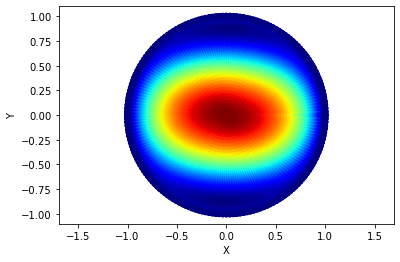

In [31]:
plt.scatter(X, Y, c=Temp, cmap=cm.jet,vmin=0)
m = cm.ScalarMappable(cmap=cm.jet)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
#plt.savefig(impath+'real_pattern.png')
plt.show()

2013-06-14 00:00:00.000


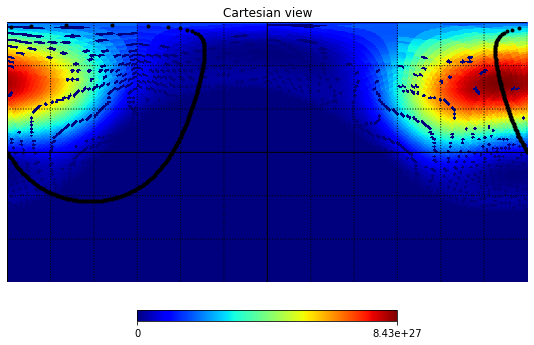

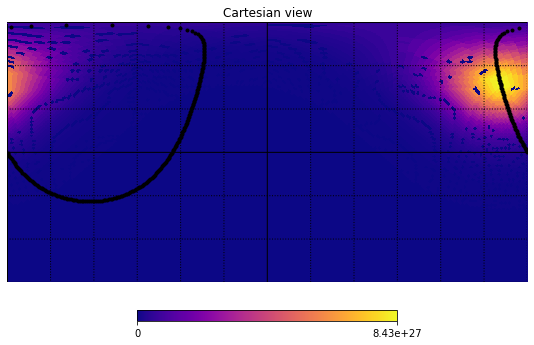

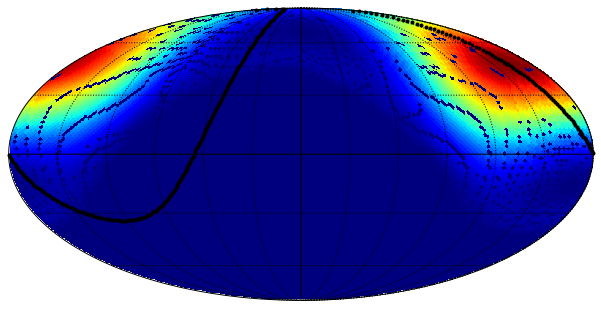

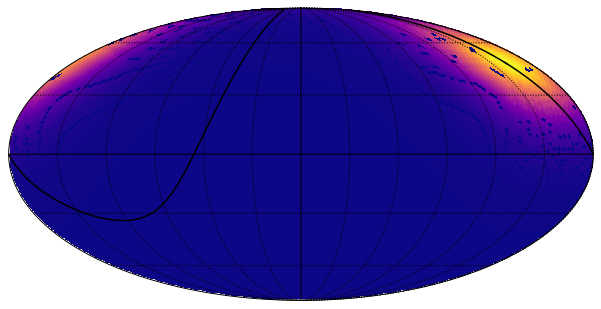

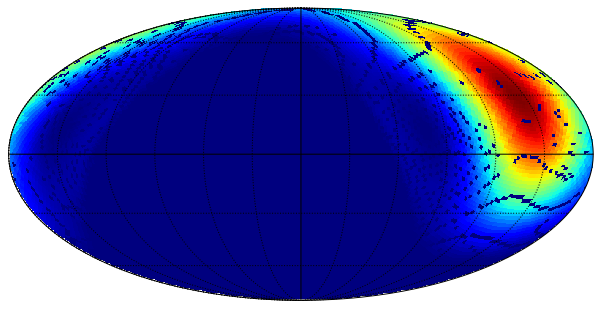

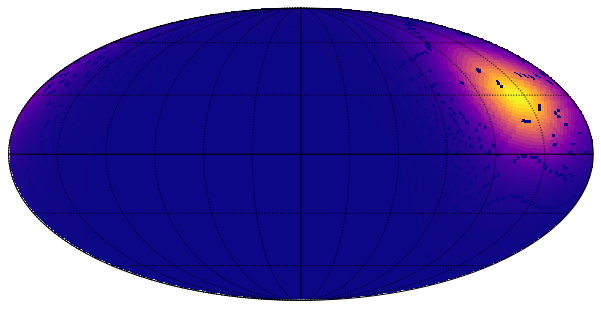

2013-06-14 04:00:00.000


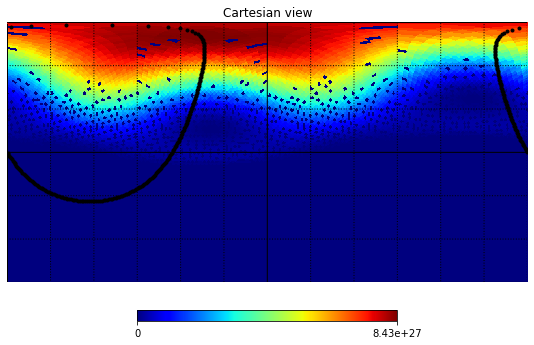

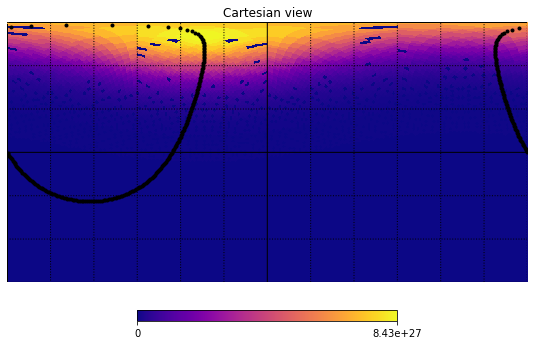

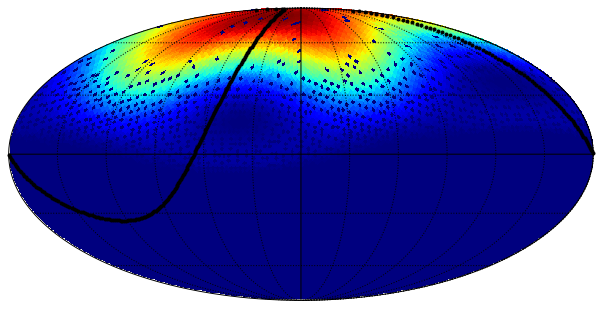

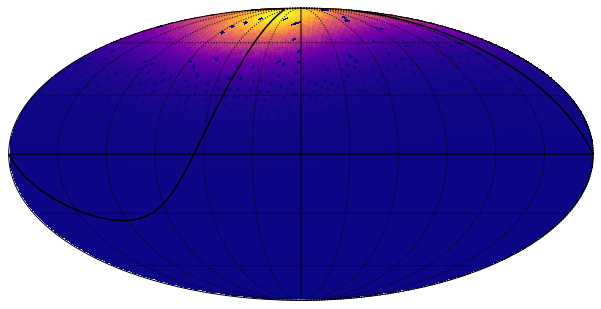

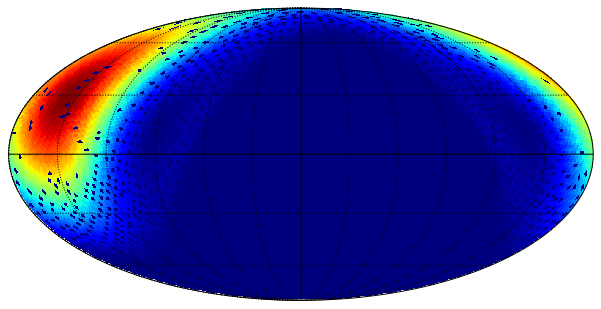

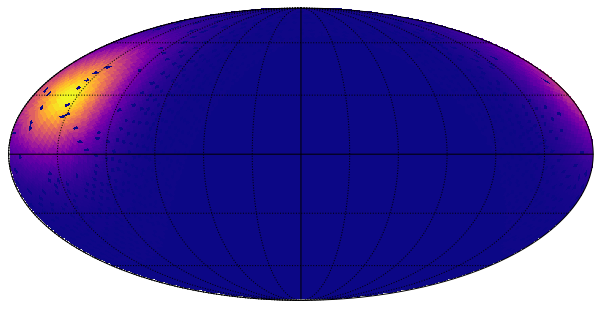

2013-06-14 08:00:00.000


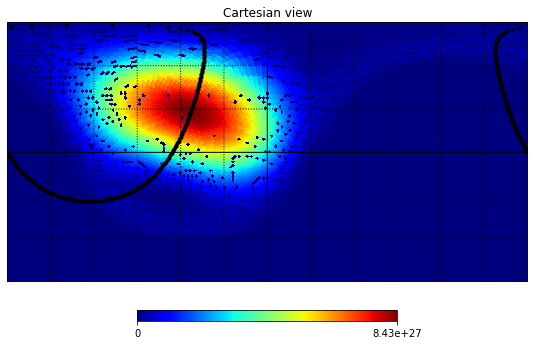

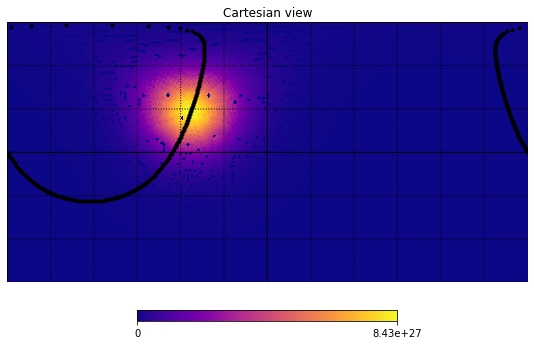

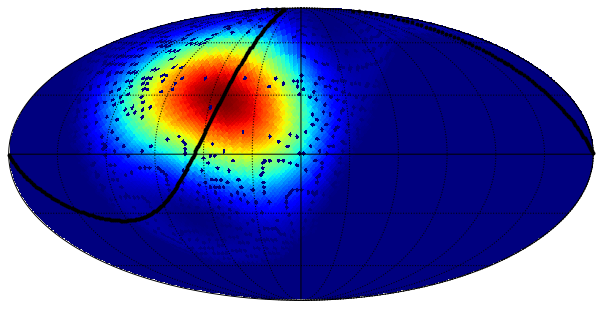

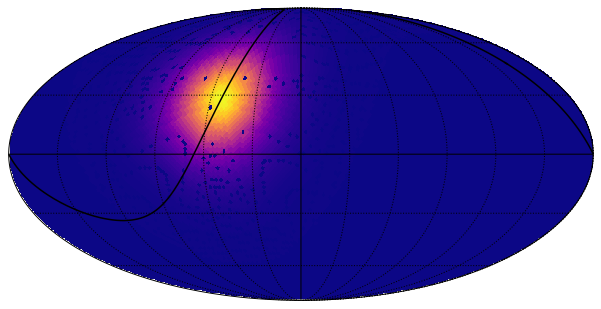

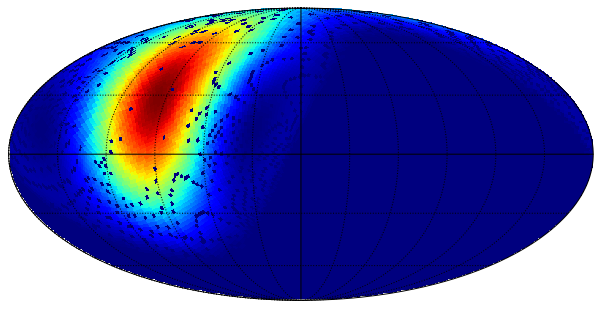

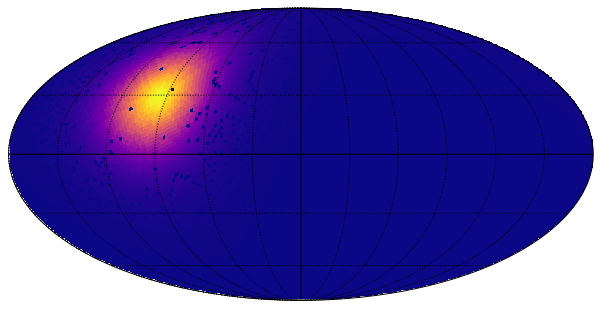

2013-06-14 12:00:00.000


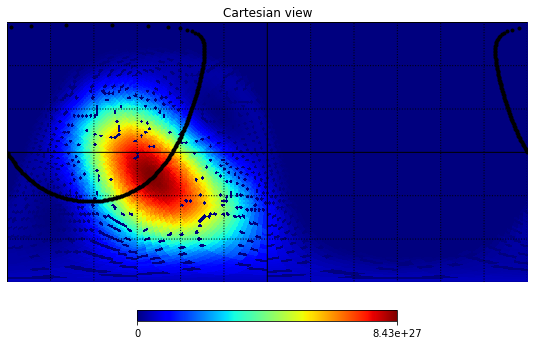

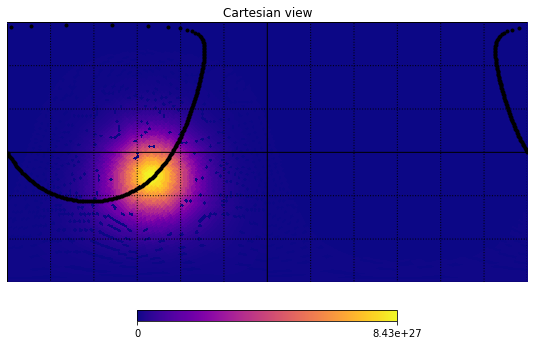

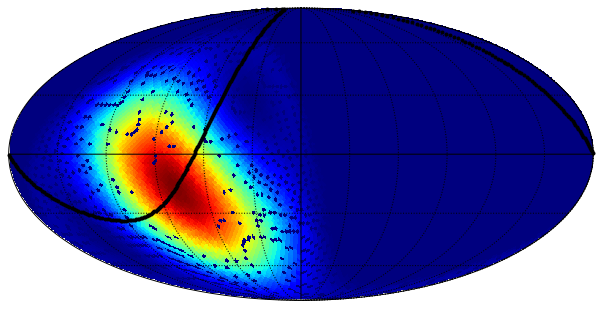

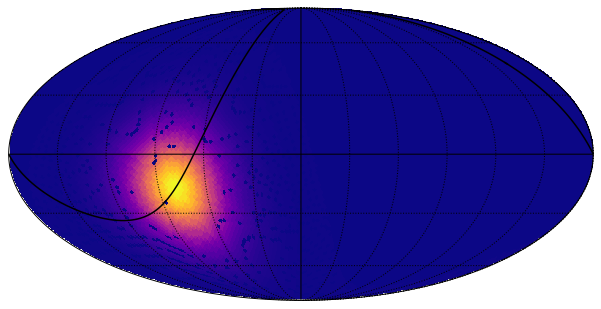

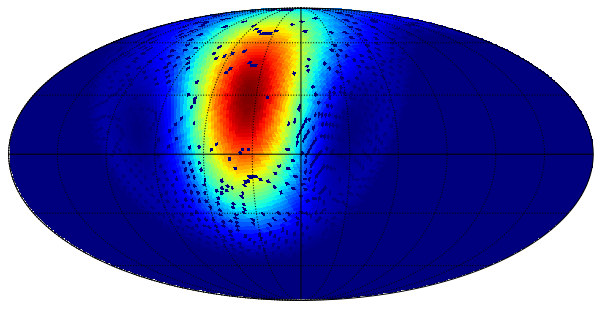

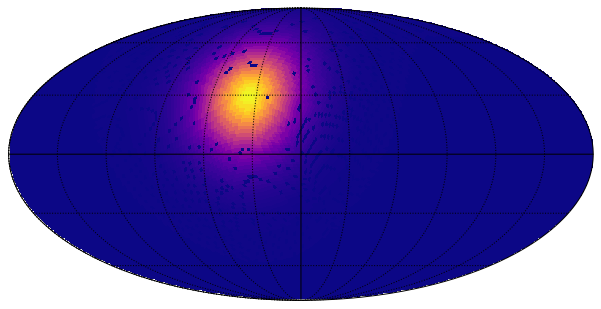

2013-06-14 16:00:00.000


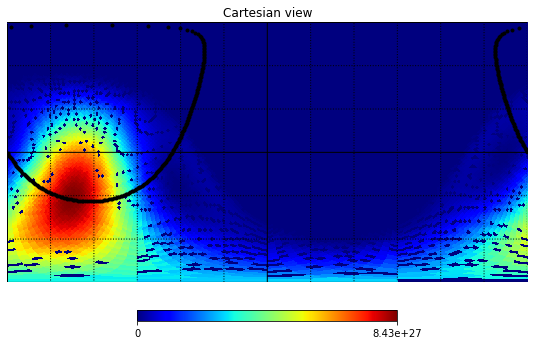

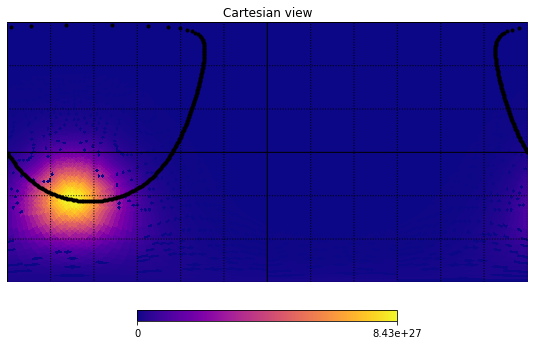

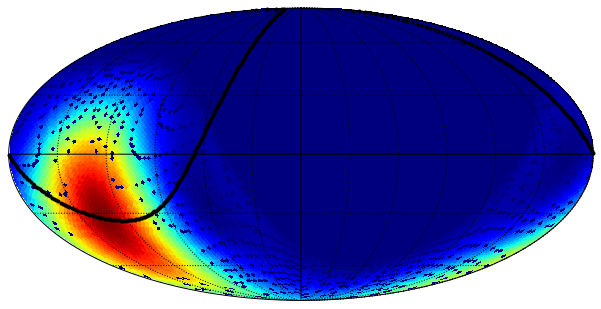

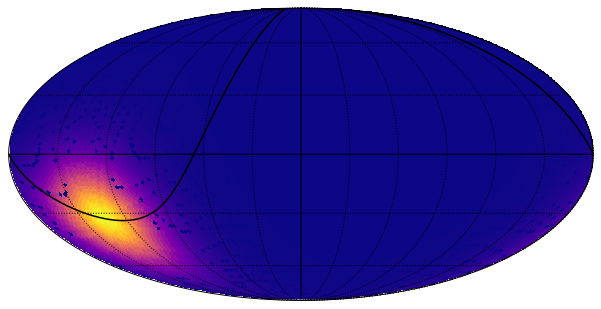

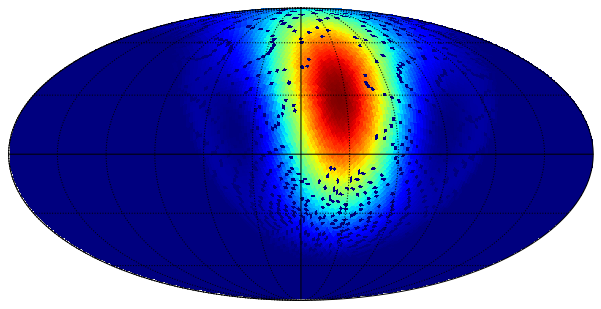

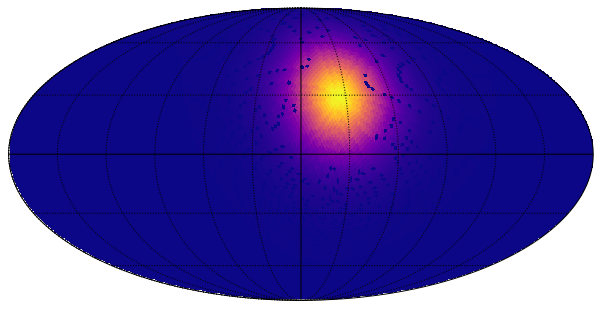

2013-06-14 20:00:00.000


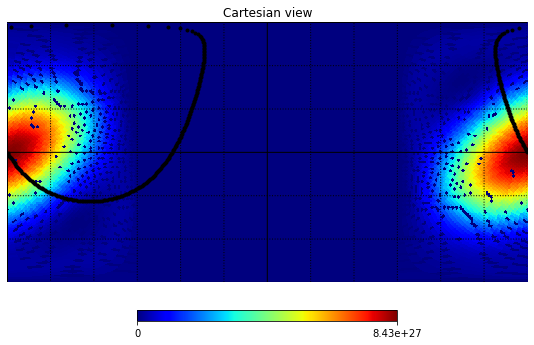

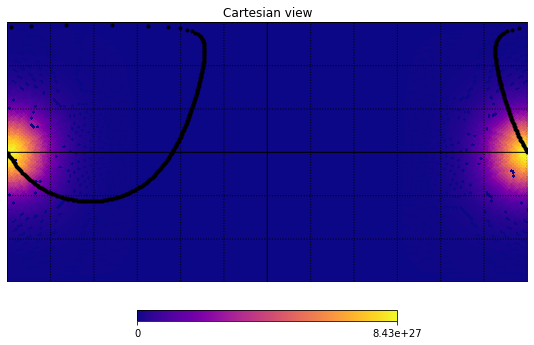

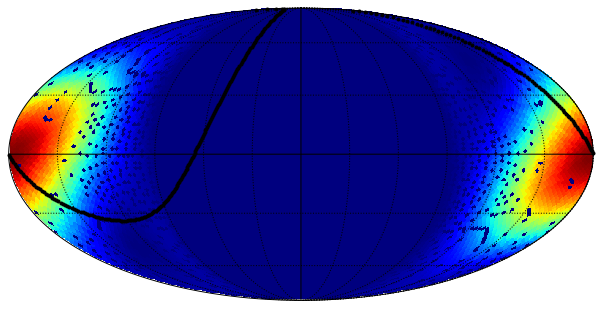

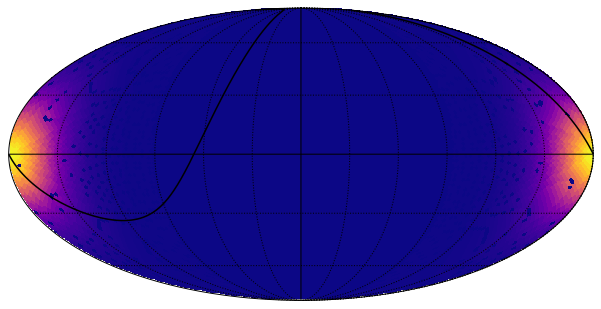

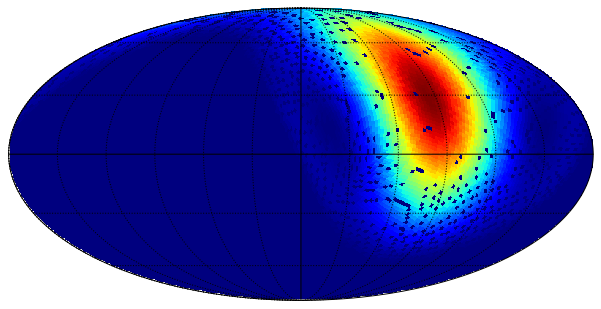

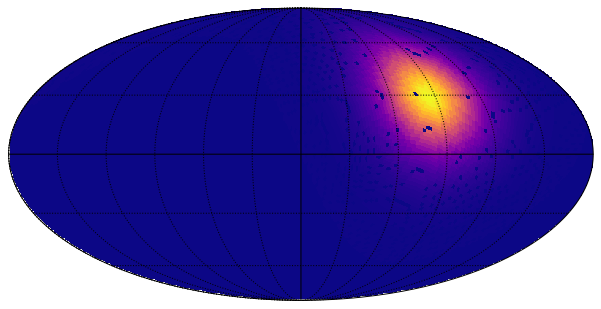

In [32]:
t0 = Time('2013-06-14 00:00:00')
dt = 4*u.hour
times = t0 + dt*np.arange(0,24/dt.value)
for i in range(len(times)):
    print (times[i])
    # Getting the pattern 
    l,b,Temp = pattern(time = times[i],Freq=70, PATH = 'antenna_beam_'+antenna+'/')
    l_mock,b_mock,Temp_mock = pattern(time = times[i],Freq=70,PATH='mock_pattern_'+antenna+'/')
    
    # Projecting the pattern into pixels.
    nside = 32
    pix = hp.ang2pix(nside,l, b, lonlat=True)
    pix_mock = hp.ang2pix(nside,l_mock, b_mock, lonlat=True)
    
    # Filling the pixels with the temperature data.
    bmap_pat = np.zeros(hp.nside2npix(nside))
    bmap_pat[pix] = Temp
    bmap_pat_mock = np.zeros(hp.nside2npix(nside))
    bmap_pat_mock[pix] = Temp_mock
    
    # Cartesian visualization.
    hp.cartview(bmap_pat,cmap=Cmap)
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    hp.graticule()
    hp.cartview(bmap_pat_mock,cmap=Cmap_mock)
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    hp.graticule()
    #plt.savefig('Imagenes/'+str(t0+i*dt)+'_cartview_gal.png')
    plt.show()
    
    #Mollweide visualization 
    hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    hp.graticule()
    hp.mollview(bmap_pat_mock,cmap=Cmap_mock,cbar=False,title='')
    hp.projplot(l_gal, b_gal,'-k',lonlat=True)
    hp.graticule()
    #plt.savefig(impath+str(t0+i*dt)+'_mollview_gal.png')
    plt.show()
    
    # Made for comparing with SCI-HI paper.
    hp.mollview(bmap_pat,coord =['G','C'],cmap=Cmap,flip='geo',cbar=False,title='',notext=True)
    hp.graticule()
    hp.mollview(bmap_pat_mock,coord =['G','C'],cmap=Cmap_mock,flip='geo',cbar=False,title='',notext=True)
    hp.graticule()
    #plt.savefig(impath+str(t0+i*dt)+'_mollview_altaz.png')
    plt.show()

## GIF generation of HIBiscus trayectory

In [33]:
if not os.path.exists('images/gif'):
    os.makedirs('images/gif')

antenna = 'biscus'

In [40]:
'''

t0 = Time('2013-06-14 00:00:00')
dt = 0.2*u.hour
times = t0 + dt*np.arange(0,24/dt.value)

for i in range(len(times)):
    print (times[i])
    # Getting the pattern 
    l,b,Temp = pattern(time = times[i],Freq=70, PATH = 'antenna_beam_'+antenna+'/')
    
    # Projecting the pattern into pixels.
    nside = 32
    pix = hp.ang2pix(nside,l, b, lonlat=True)
    
    # Filling the pixels with the temperature data.
    bmap_pat = np.zeros(hp.nside2npix(nside))
    bmap_pat[pix] = Temp
    
    #Mollweide visualization 
    hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
    hp.projplot(l_gal, b_gal,'.k',lonlat=True)
    hp.graticule()
    plt.savefig(impath+'gif/'+str(t0+i*dt)+'_mollview_gal.png')
'''
print(':)')

:)
